In [ ]:
!pip install scikit-plot
!pip install afinn
!pip install newspaper3k

In [23]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplot


from wordcloud import WordCloud
import re

# text imports

import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from afinn import Afinn
from newspaper import Article
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
#One Plus X
one_URL = 'https://www.techradar.com/reviews/phones/mobile-phones/oneplus-x-1307733/review'
article = Article(one_URL)
article.download()
article.parse()
wc = WordCloud(background_color="white")
wordcloud = wc.generate(article.text)

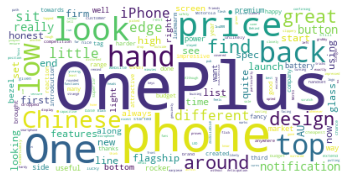

In [17]:
# # Display the  plot:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [18]:
text = article.text.replace('\n', '')
one_sentences = text.split('.')

In [30]:
def polarity_score(text):
    p = TextBlob(text).sentiment.polarity
    return p

def subjectivity_score(text):
    s = TextBlob(text).sentiment.subjectivity
    return s

def sent_score(text):
    afinn=Afinn()
    return afinn.score(text)


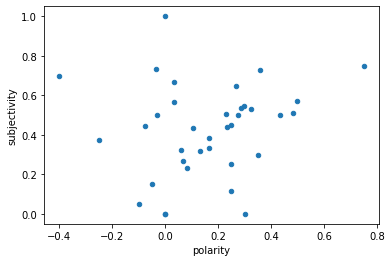

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


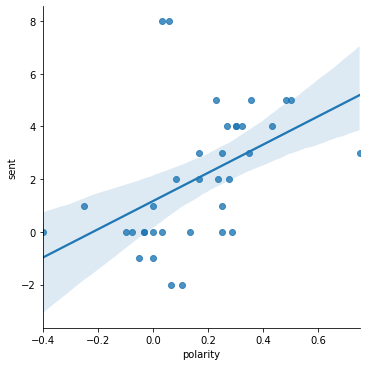

In [31]:
#Calculate Scores and complie them in a df
def calculate_scores(df):
    df = df.copy(deep = True)
    
    df['polarity'] = df.Sentences.apply(polarity_score)

    df['subjectivity'] = df.Sentences.apply(subjectivity_score)

    df['sent'] = df.Sentences.apply(sent_score)
    return df

mobile_df = pd.DataFrame({'Sentences' : one_sentences, 'Model' : 'One Plus X', 'Label' : '0'} )

mobile_df['polarity'] = mobile_df.Sentences.apply(polarity_score)

mobile_df['subjectivity'] = mobile_df.Sentences.apply(subjectivity_score)

mobile_df['sent'] = mobile_df.Sentences.apply(sent_score)

mobile_df.plot.scatter('polarity', 'subjectivity')
plt.show()

sns.lmplot('polarity', 'sent', data = mobile_df)
plt.show()

In [ ]:
#ZTE Star 2

In [37]:
ZTE_URL = 'https://www.techradar.com/reviews/phones/mobile-phones/zte-star-2-1286096/review'
article2 = Article(ZTE_URL)
article2.download()
article2.parse()
wcd = WordCloud(background_color="white")
wordcloud2 = wc.generate(article2.text)

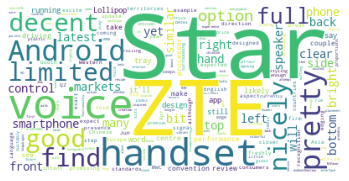

In [35]:
# # Display the  plot:
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

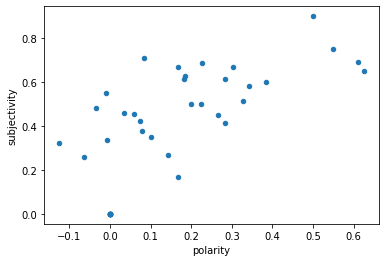

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


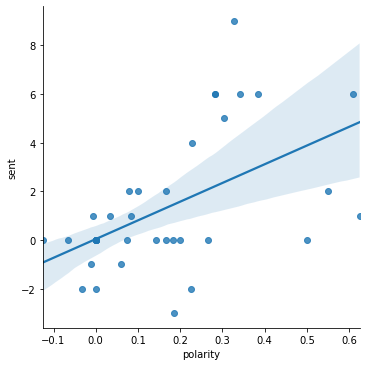

In [39]:
text = article2.text.replace('\n', '')
ZTE_sentences = text.split('.')

ZTE_df = pd.DataFrame({'Sentences' : ZTE_sentences, 'Model' : 'ZTE Star 2', 'Label' : '0'} )

ZTE_df = calculate_scores(ZTE_df)

ZTE_df.plot.scatter('polarity', 'subjectivity')
plt.show()

sns.lmplot('polarity', 'sent', data = ZTE_df)
plt.show()
mobile_df = mobile_df.append(ZTE_df)

In [40]:
mobile_df.groupby('Model').mean()

,polarity,subjectivity,sent
Model,,,
One Plus X,0.159514,0.426497,2.027778
ZTE Star 2,0.162203,0.410347,1.289474
